In [1]:
import wikipedia

for index in range(1000):
    try:
        p = wikipedia.page(wikipedia.random(1))
        p = '\n'.join([line for line in p.content.split('\n') if len(line.strip()) > 0 and not line.startswith('=')])
        with open('./DatasetWikipedia/%d.txt' % index, 'w') as f:
            f.write(p)
    except:
        pass

C:\Users\lukas\anaconda3\envs\ML\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file C:\Users\lukas\anaconda3\envs\ML\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [5]:
import os

txt_files_path = './DatasetWikipedia'
txt_list = [f'{txt_files_path}/{file}' for file in os.listdir(txt_files_path)]
for txt in txt_list:
#     print(txt)
    if not os.path.getsize(txt):
        os.remove(txt)

In [201]:
import os

txt_output = './DatasetWikipedia/source.txt'
txt_files_path = './DatasetWikipedia'
txt_list = [f'{txt_files_path}/{file}' for file in os.listdir(txt_files_path)]
with open(txt_output, 'a') as f:
    for txt in txt_list:
        with open(txt, 'r') as f2:
            for line in f2:
                f.write(line)
        f.write('\n')

In [1]:
import os
from PIL import Image, ImageDraw, ImageFont

text_source = './text_full.txt'
fonts_path = './Fonts'
fonts = [f'{fonts_path}/{f}' for f in os.listdir(fonts_path)]
fonts

['./Fonts/arial.ttf',
 './Fonts/calibri.ttf',
 './Fonts/impact.ttf',
 './Fonts/Roboto-Regular.ttf',
 './Fonts/times.ttf',
 './Fonts/trebuc.ttf',
 './Fonts/verdana.ttf']

MAX LEN: 1804
Chars: 1837808
Words: 344815
Lines: 10845
Max char len: 319
Longest word: https://books.google.com/books?id=UXaQat5icHUC&pg=PA197&lpg=PA197&dq=what+is+Delphinium+Scopulorum+used+for&source=bl&ots=R__340kIoL&sig=vSmByyCCaGdIptZ278KseOsL6hw&hl=en&ei=gsrTTZiECYTfgQeXgb0u&sa=X&oi=book_result&ct=result&resnum=1&ved=0CB0Q6AEwAA#v=onepage&q=what%20is%20Delphinium%20Scopulorum%20used%20for&f=false



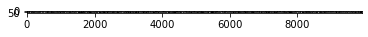

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

def gen_text_image(text, padding=16):
    font = random.choice(fonts)
    fnt = ImageFont.truetype(font, 60)
    width, _ = fnt.getsize(text)
#     print(font)
    img = Image.new('L', (width + (padding + 1) * 2, 64), color = 0)
    d = ImageDraw.Draw(img)

    if 'calibri' in font:
        d.text((padding + 2,2), text, font=fnt, fill=255)
    elif 'verdana' in font:
        d.text((padding + 2,-8), text, font=fnt, fill=255)
    else:
        d.text((padding + 2,-6), text, font=fnt, fill=255)

    plt.imshow(np.asarray(img), cmap='gray', vmin=0, vmax=255)

with open(text_source) as txt:
    line_lens = []
    max_char_len = 0
    longest_word = ''
    char_len = 0
    word_list = []
    for i, line in enumerate(txt):
        words = line.split(' ')
        # max 5-word-long sequences
        num_sequences = (len(words) + 1) // 5
        word_list.extend(words)
        line_lens.append(len(words))
        for word in words:
            char_len += len(word)
            if len(word) > max_char_len:
                max_char_len = len(word)
                longest_word = word
#             gen_text_image(word)
#         break
print(f'MAX LEN: {max(line_lens)}')
print(f'Chars: {char_len}')
print(f'Words: {sum(line_lens)}')
print(f'Lines: {len(line_lens)}')
print(f'Max char len: {max_char_len}')
print(f'Longest word: {longest_word}')
line_lens.sort(reverse=True)
line_lens[0]
# word_list[1000:1010]
gen_text_image(longest_word)